In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

# 生成数据集

In [2]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
# 这里synthetic_data函数跟3.2的自己实现的那个是一样的
# d2l库相当于提供了参考答案，这一节不需要再写一遍了，所以直接调用一下答案就能用了
features,labels = d2l.synthetic_data(true_w,true_b,1000)

# 读取数据集

In [3]:
def load_array(data_arrays,batch_size,is_train = True):
    # 这里的data_arrays一般不是一个array，而是标准数据集的data和labels对
    # 用这里的变量定义输入就是data_arrays = (features,labels)
    # 调用data.TensorDataset出来的dataset就是定义好的数据集类型
    dataset = data.TensorDataset(*data_arrays)
    # 然后因为我们训练是要batch化训练，因此定义一个dataloader
    # 这个dataloader对象对应的是linearRegression里面的data_iter函数，可以在for循环作为条件进行调用的
    # 每次返回一个batch
    return data.DataLoader(dataset,batch_size,shuffle=is_train)
    # 至于那个is_Train，如果是训练，那么每一次迭代肯定需要将序号打乱，所以如果是训练，那么就shuffle

In [5]:
batch_size = 10
# 定义batch数据迭代器
data_iter = load_array((features,labels),batch_size=batch_size)

In [15]:
# 这里试试这个dataloader
# 调用方法如下，需要先将dataloader强制转化成迭代器
# 再用迭代器的next方法索引出一个batch
smt1 = next(iter(data_iter))
print(smt1,len(smt1),smt1[0].shape)
# 返回的是一个batch的(x,y)
# 用括号括起来的是list，每个元素是什么类型无所谓。
# 但是list里面的x和y元素都是tensor

[tensor([[-0.0445,  1.0809],
        [-0.4747,  1.4277],
        [ 0.6821,  1.6613],
        [-0.9305, -1.0961],
        [ 0.7010, -0.1225],
        [-1.7373,  3.0658],
        [-1.2886, -1.7702],
        [-0.0651, -0.0982],
        [-1.6570,  0.4912],
        [ 1.3796,  0.3791]]), tensor([[ 0.4411],
        [-1.5873],
        [-0.0970],
        [ 6.0606],
        [ 6.0208],
        [-9.6828],
        [ 7.6346],
        [ 4.3945],
        [-0.7778],
        [ 5.6643]])] 2 torch.Size([10, 2])


# 定义模型（function set）

这里定义模型就要用到torch里的nn库，nn库就是neural network的简写
本节我们只做最基本的linear regression，仅需用到sequential和linear两个定义

linear指的是一个神经元，这个神经元输入到输出是线性的。即$y=\sum w_ix_i +b$
linear和后面ReLU和sigmoid是同级的函数
然后里面用括号括起来的参数，一个是输入的个数一个是输出的个数。这里是二输入一输出。

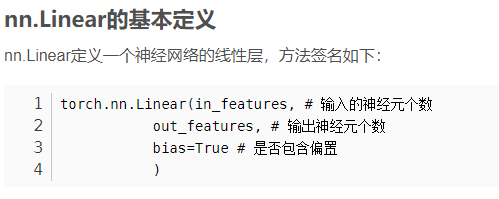

参考文献：https://blog.csdn.net/zhaohongfei_358/article/details/122797190

sequential是层连接函数，不过本节只有一个层，所以看不出来具体的应用。后面应该还会提。

In [18]:
from torch import nn
net = nn.Sequential(nn.Linear(2,1))
print(type(net),type(net[0]))
# sequential就可以往里填各种层，用逗号隔开就可以
# 然后用类似数组的方式索引的时候就是每一个层

<class 'torch.nn.modules.container.Sequential'> <class 'torch.nn.modules.linear.Linear'>


In [24]:
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)
# 由下面例子可知，这里weight和bias是nn.Linear的属性
# 然后weight和bias本身都是张量，后面的data.normal_和data.fill_都是tensor本身的方法
# normal_是正态分布的随机数，fill_是用输入填充tensor，两个方法都是为了让模型有个初始值
testTensor1 = torch.tensor([1.0,3.0])
print(testTensor1)
testTensor1.data.normal_(0,0.01)
print(testTensor1)


tensor([1., 3.])
tensor([-0.0094,  0.0102])


# 定义Loss Function

In [ ]:
loss = nn.MSELoss()# MSE:mean square error均方误差

# 定义优化算法（optimizer）

optimizer需要从torch.optim里面选，这里用到了SGD（stochastic gradient descent，随机梯度下降）方法，然后其输入是优化的参数，学习率，以及需不需要momentum

然后这里面net.parameters()就是当前网络中所有的参数。都给到SGD中

In [26]:
print(net.parameters())
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

<generator object Module.parameters at 0x0000020A87093E08>


# 训练